# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
import sys
print(sys.executable)


/Users/anjali.shaw/Documents/ML & NLP/Starter Notebook + Data - nlp/venv/bin/python


In [4]:
!"{sys.executable}" -m pip install --upgrade numpy==1.26.4
!"{sys.executable}" -m pip install --upgrade pandas==2.2.2
!"{sys.executable}" -m pip install --upgrade nltk==3.9.1

  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Using cached pandas-2.2.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp310-cp310-macosx_11_0_arm64.whl (11.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [nltk]4/5 [nltk]b]


In [82]:
!"{sys.executable}" -m pip install --upgrade numpy==1.26.4
!"{sys.executable}" -m pip install --upgrade pandas==2.2.2
!"{sys.executable}" -m pip install --upgrade nltk==3.9.1
!"{sys.executable}" -m pip install --upgrade spacy==3.7.5
!"{sys.executable}" -m pip install --upgrade scipy==1.12
!"{sys.executable}" -m pip install --upgrade pydantic==2.10.5
!"{sys.executable}" -m pip install wordcloud==1.9.4
!"{sys.executable}" -m pip install seaborn
!"{sys.executable}" -m pip install plotly
!"{sys.executable}" -m pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-macosx_12_0_arm64.whl (8.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scikit-learn] [scikit-learn]


In [83]:
!"{sys.executable}" -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.6 MB/s  0:00:00 eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [142]:
!"{sys.executable}" -m pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 13.0 MB/s  0:00:01m0:00:0100:01


## Importing the necessary libraries

In [84]:
import spacy
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")


spaCy model loaded successfully!


In [85]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operation

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [86]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [43]:
# Import the first file - True.csv
true_df = pd.read_csv("True.csv")

# Import the second file - Fake.csv
fake_df = pd.read_csv("Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [44]:
# Inspect the DataFrame with True News to understand the given data
true_df.head()


,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [45]:
# Check the shape of the dataset (rows, columns)
true_df.shape


(21417, 3)

In [46]:
true_df.columns

Index(['title', 'text', 'date'], dtype='object')

In [47]:
true_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [48]:
true_df.describe(include='all')

,title,text,date
count,21417,21417,21417
unique,20826,21192,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,"December 20, 2017"
freq,14,8,182


In [49]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [50]:
# Print the column details for True News DataFrame
true_df.columns

Index(['title', 'text', 'date'], dtype='object')

In [51]:
# Print the column details for Fake News Dataframe
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [52]:
# Print the column names of both DataFrames
true_df.columns

Index(['title', 'text', 'date'], dtype='object')

In [53]:
fake_df.columns

Index(['title', 'text', 'date'], dtype='object')

### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [54]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df["news_label"] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df["news_label"] = 0

In [55]:
true_df.head()

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


In [56]:
fake_df.head()

,title,text,date,news_label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",0


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [57]:
# Combine the true and fake news DataFrames into a single DataFrame
news_df = pd.concat([true_df, fake_df], axis=0, ignore_index=True)

In [58]:
# Display the first 5 rows of the combined DataFrame to verify the result
news_df.head()
news_df.tail()
news_df.shape


(44940, 4)

In [59]:
news_df.head()

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [60]:
# Check Presence of Null Values
news_df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [61]:
# Handle Rows with Null Values
news_df = news_df.dropna().reset_index(drop=True)

In [62]:
news_df.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [63]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_df["news_text"] = (
    news_df["title"].astype(str) + " " +
    news_df["text"].astype(str)
)

# Drop the irrelevant columns from the DataFrame as they are no longer needed

news_df = news_df.drop(columns=["title", "text"])

# Display the first 5 rows of the updated DataFrame to check the result
news_df.head()

,date,news_label,news_text
0,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [70]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = news_df[["news_text", "news_label"]].copy()
# Add 'news_label' column to the new dataframe for topic identification
# Column for cleaned text
df_clean["clean_news_text"] = ""

# Column for lemmatized text (POS removed)
df_clean["lemmatized_text"] = ""


In [71]:
df_clean.head()

,news_text,news_label,clean_news_text,lemmatized_text
0,"As U.S. budget fight looms, Republicans flip t...",1,,
1,U.S. military to accept transgender recruits o...,1,,
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,,
3,FBI Russia probe helped by Australian diplomat...,1,,
4,Trump wants Postal Service to charge 'much mor...,1,,


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [72]:
# Write the function here to clean the text and remove all the unnecessary elements
import re
import string

def clean_text(text):
    # Convert to lower case
    text = text.lower()
    
    # Remove text in square brackets
    text = re.sub(r"\[.*?\]", "", text)
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Remove words with numbers
    text = re.sub(r"\w*\d\w*", "", text)
    
    return text

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [73]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean["clean_news_text"] = df_clean["news_text"].apply(clean_text)



In [74]:
df_clean[["news_text", "clean_news_text"]].head()


,news_text,clean_news_text
0,"As U.S. budget fight looms, Republicans flip t...",as us budget fight looms republicans flip thei...
1,U.S. military to accept transgender recruits o...,us military to accept transgender recruits on ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,senior us republican senator let mr mueller do...
3,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge much more...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [95]:
def spacy_pos_lemmatize(text):
    doc = nlp(text)
    
    tokens = [
        token.lemma_
        for token in doc
        if token.pos_ == "NOUN"        # NN & NNS
        and not token.is_stop         # remove stopwords
        and token.is_alpha            # keep only words
    ]
    
    return " ".join(tokens)


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [96]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean["lemmatized_text"] = df_clean["clean_news_text"].apply(spacy_pos_lemmatize)


In [100]:
df_clean["lemmatized_text"].head()

0                                                                                                                                                                                                                                                                                                                                                                                                budget fight script head faction month expansion debt tax cut conservative budget restraint pivot way representative mark meadow nation line spending lawmaker battle holiday lawmaker budget fight issue immigration policy election campaign approach control budget increase spending democrat increase nondefense spending program education research infrastructure health protection administration nondefense spending percent chairman house freedom program government pay raise percent conservative rationale people money meadow republican party tax overhaul budget deficit year debt mark responsibility tax bill genera

### Save the Cleaned data as a csv file (Recommended)

In [101]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [102]:
# Check the first few rows of the DataFrame
df_clean.head()

news_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both disc

In [103]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 4)

In [ ]:
df_clean.info()

In [104]:
df_clean.isnull().sum()


news_text           0
news_label          0
clean_news_text     0
lemmatized_text    16
dtype: int64

In [105]:
df_clean = df_clean.dropna(subset=["lemmatized_text"]).reset_index(drop=True)

In [106]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44882 entries, 0 to 44881
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        44882 non-null  object
 1   news_label       44882 non-null  int64 
 2   clean_news_text  44882 non-null  object
 3   lemmatized_text  44882 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [108]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(
    df_clean,
    test_size=0.30,
    random_state=42,
    stratify=df_clean["news_label"]
)

In [109]:
print(train_df.shape)
print(val_df.shape)

print(train_df["news_label"].value_counts(normalize=True))
print(val_df["news_label"].value_counts(normalize=True))


(31417, 4)
(13465, 4)
news_label
0    0.522806
1    0.477194
Name: proportion, dtype: float64
news_label
0    0.522837
1    0.477163
Name: proportion, dtype: float64


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [110]:
# Add a new column to calculate the character length of cleaned news text
train_df['clean_text_char_len'] = train_df['clean_news_text'].astype(str).apply(len)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_text_char_len'] = train_df['lemmatized_text'].astype(str).apply(len)

In [111]:
train_df[['clean_text_char_len', 'lemmatized_text_char_len']].describe()

,clean_text_char_len,lemmatized_text_char_len
count,31417.000000,31417.000000
mean,2451.712831,711.326002
std,1916.940045,581.225708
min,25.000000,3.000000
25%,1269.000000,356.000000
50%,2196.000000,619.000000
75%,3081.000000,904.000000
max,31589.000000,10288.000000


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

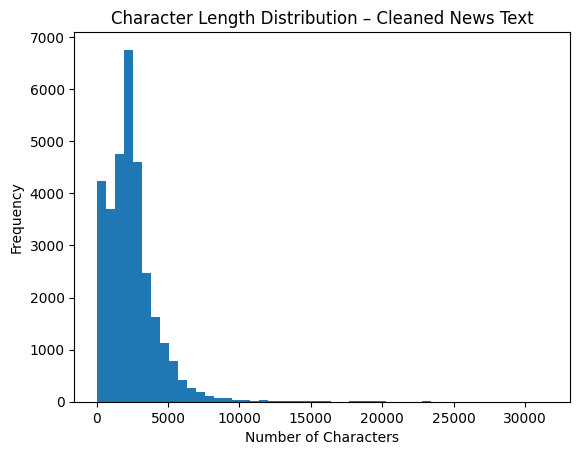

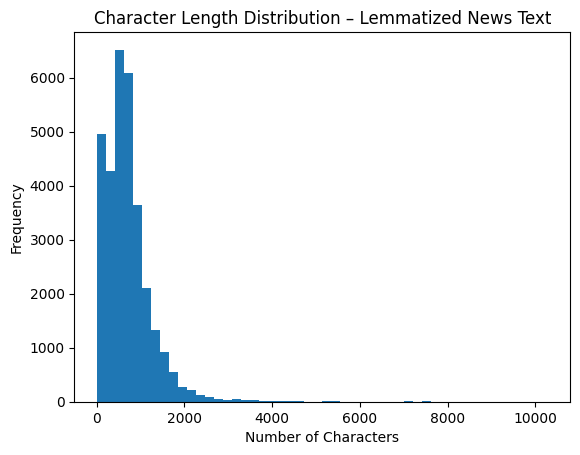

In [112]:
# Create a histogram plot to visualise character lengths
plt.figure()
plt.hist(train_df['clean_text_char_len'], bins=50)
plt.title('Character Length Distribution – Cleaned News Text')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed
plt.figure()
plt.hist(train_df['lemmatized_text_char_len'], bins=50)
plt.title('Character Length Distribution – Lemmatized News Text')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

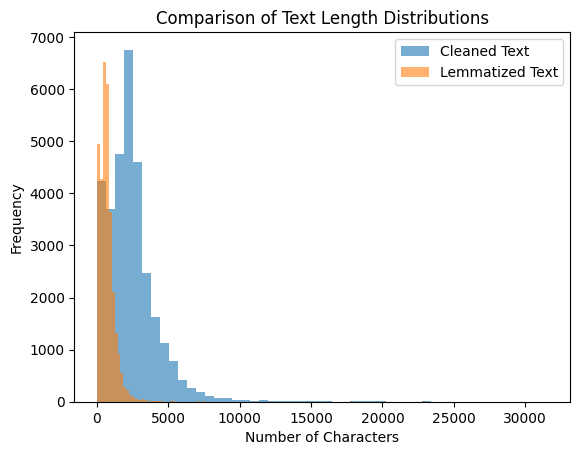

In [114]:
plt.figure()
plt.hist(train_df['clean_text_char_len'], bins=50, alpha=0.6, label='Cleaned Text')
plt.hist(train_df['lemmatized_text_char_len'], bins=50, alpha=0.6, label='Lemmatized Text')
plt.legend()
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Comparison of Text Length Distributions')
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

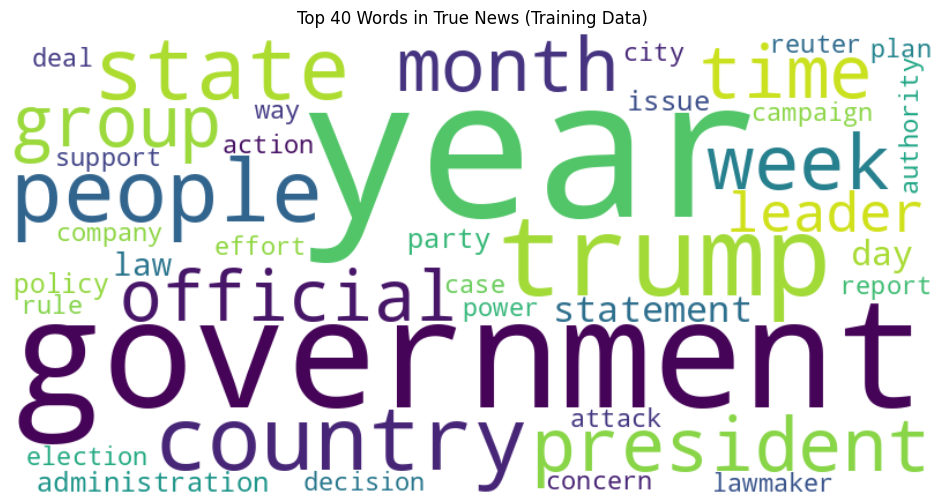

In [115]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter True News
true_news = train_df[train_df['news_label'] == 1]

# Convert to string and handle non-string / null values
true_text = true_news['lemmatized_text'].dropna().astype(str)

# Combine all text into a single string
true_text_str = " ".join(true_text)


# Generate word cloud for True News
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=40,
    background_color='white'
).generate(true_text_str)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Training Data)')
plt.show()


In [118]:
from collections import Counter

Counter(true_text_str.split()).most_common(10)


[('trump', 25395),
 ('state', 14363),
 ('government', 13886),
 ('year', 13313),
 ('people', 10862),
 ('election', 9934),
 ('country', 9810),
 ('official', 9307),
 ('party', 8292),
 ('campaign', 7912)]

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

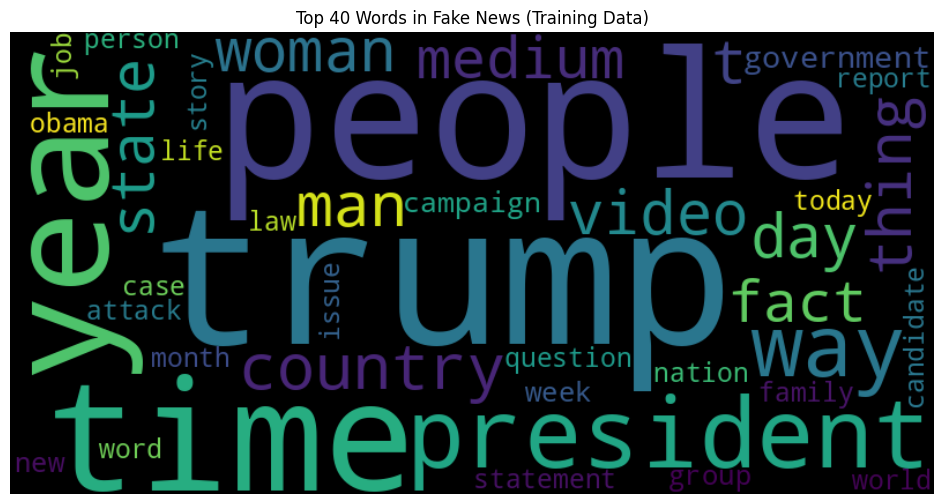

In [116]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter Fake News
fake_news = train_df[train_df['news_label'] == 0]

# Convert to string and handle non-string / null values
fake_text = fake_news['lemmatized_text'].dropna().astype(str)

# Combine all text into a single string
fake_text_str = " ".join(fake_text)


# Generate word cloud for Fake News
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=40,
    background_color='black'
).generate(fake_text_str)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Training Data)')
plt.show()


In [117]:
from collections import Counter

Counter(fake_text_str.split()).most_common(10)

[('trump', 35984),
 ('people', 18432),
 ('time', 11224),
 ('year', 10428),
 ('president', 10324),
 ('image', 9789),
 ('state', 9031),
 ('woman', 8398),
 ('video', 8152),
 ('news', 7903)]

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [119]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(text_series, ngram_range=(1, 1), top_n=20):
    """
    Get top n-grams by frequency.
    
    Parameters:
        text_series (pd.Series): Series containing processed text
        ngram_range (tuple): (n, n) for fixed n-grams (e.g., (2,2) for bigrams)
        top_n (int): Number of top n-grams to return
    
    Returns:
        pd.DataFrame: n-grams and their frequencies
    """
    
    # Drop missing values and convert to string
    text_series = text_series.dropna().astype(str)
    
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(text_series)
    
    # Sum word counts across all documents
    ngram_counts = X.sum(axis=0).A1
    
    # Map n-grams to counts
    ngram_freq = dict(zip(vectorizer.get_feature_names_out(), ngram_counts))
    
    # Sort and get top n
    top_ngrams = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    return pd.DataFrame(top_ngrams, columns=['ngram', 'frequency'])


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [121]:
# Handle NaN values in the text data
# Replace NaN values in text columns with empty strings
text_cols = ["news_text", "clean_news_text", "lemmatized_text"]

train_df[text_cols] = train_df[text_cols].fillna("")


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [123]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
from collections import Counter
import matplotlib.pyplot as plt

# Filter True News
true_news = train_df[train_df['news_label'] == 1]

# Convert to string and drop empty rows
true_text = true_news['lemmatized_text'].dropna().astype(str)

# Tokenize (unigrams = single words)
tokens = " ".join(true_text).split()

In [124]:
# Count unigram frequencies
unigram_freq = Counter(tokens)

# Get top 10
top_10_unigrams = unigram_freq.most_common(10)

# Print them
print("Top 10 Unigrams in True News:")
for word, freq in top_10_unigrams:
    print(f"{word}: {freq}")


Top 10 Unigrams in True News:
trump: 25395
state: 14363
government: 13886
year: 13313
people: 10862
election: 9934
country: 9810
official: 9307
party: 8292
campaign: 7912


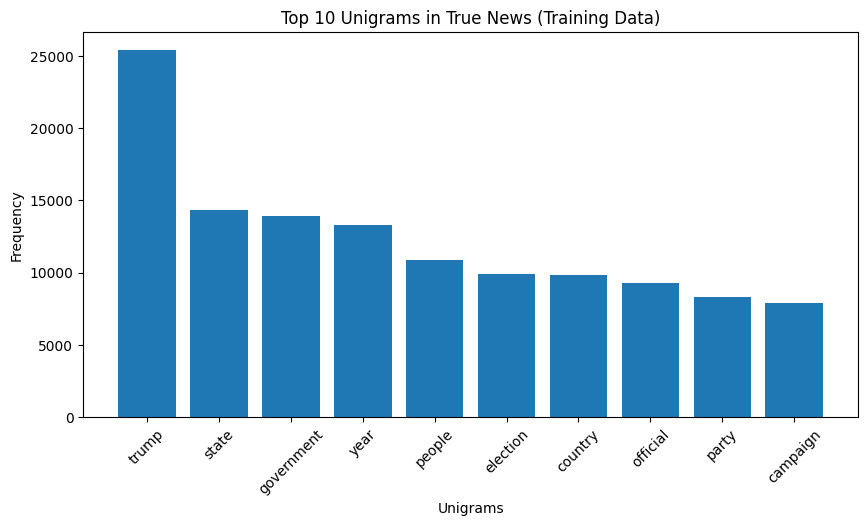

In [125]:
words = [word for word, freq in top_10_unigrams]
frequencies = [freq for word, freq in top_10_unigrams]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Unigrams in True News (Training Data)")
plt.xticks(rotation=45)
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [128]:
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Filter True News
true_news = train_df[train_df['news_label'] == 1]

# Prepare text
true_text = true_news['lemmatized_text'].dropna().astype(str)

# Tokenize
tokens = " ".join(true_text).split()


In [129]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
# Generate bigrams
bigrams = list(ngrams(tokens, 2))

# Count bigram frequencies
bigram_freq = Counter(bigrams)

# Get top 10 bigrams
top_10_bigrams = bigram_freq.most_common(10)

# Print
print("Top 10 Bigrams in True News:")
for bg, freq in top_10_bigrams:
    print(f"{bg}: {freq}")


Top 10 Bigrams in True News:
('trump', 'campaign'): 1263
('news', 'conference'): 954
('percent', 'percent'): 768
('security', 'force'): 743
('climate', 'change'): 717
('request', 'comment'): 715
('tax', 'reform'): 708
('trump', 'administration'): 680
('house', 'representative'): 647
('intelligence', 'agency'): 639


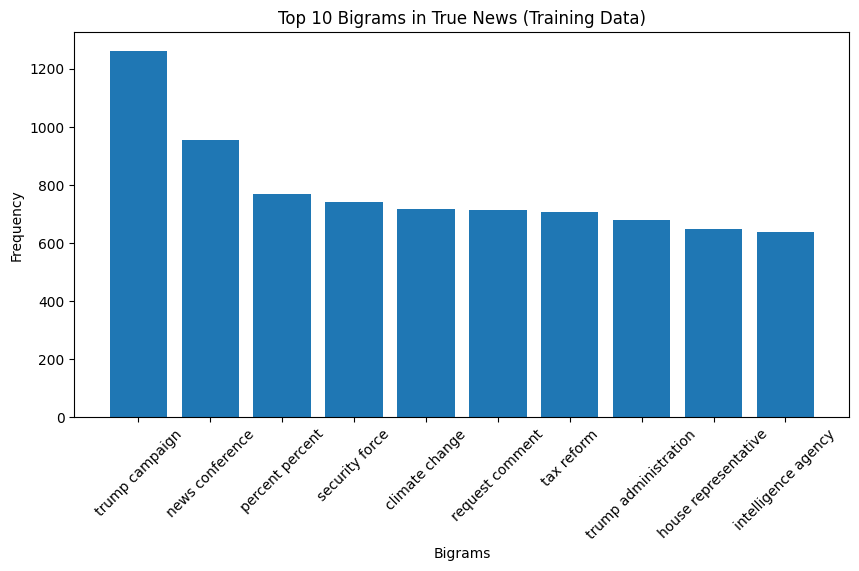

In [130]:
# Prepare data for plotting
bigram_labels = [" ".join(bg) for bg, freq in top_10_bigrams]
frequencies = [freq for bg, freq in top_10_bigrams]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(bigram_labels, frequencies)
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Bigrams in True News (Training Data)")
plt.xticks(rotation=45)
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [131]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
# Generate trigrams (3-word combinations)
trigrams = list(ngrams(tokens, 3))

# Count trigram frequencies
trigram_freq = Counter(trigrams)

# Get top 10 trigrams
top_10_trigrams = trigram_freq.most_common(10)

# Print
print("Top 10 Trigrams in True News:")
for tg, freq in top_10_trigrams:
    print(f"{tg}: {freq}")


Top 10 Trigrams in True News:
('official', 'condition', 'anonymity'): 240
('trump', 'transition', 'team'): 180
('tax', 'rate', 'percent'): 161
('article', 'staff', 'involvement'): 122
('staff', 'involvement', 'creation'): 122
('involvement', 'creation', 'production'): 122
('circuit', 'court', 'appeal'): 122
('state', 'department', 'official'): 121
('trump', 'travel', 'ban'): 116
('use', 'email', 'server'): 114


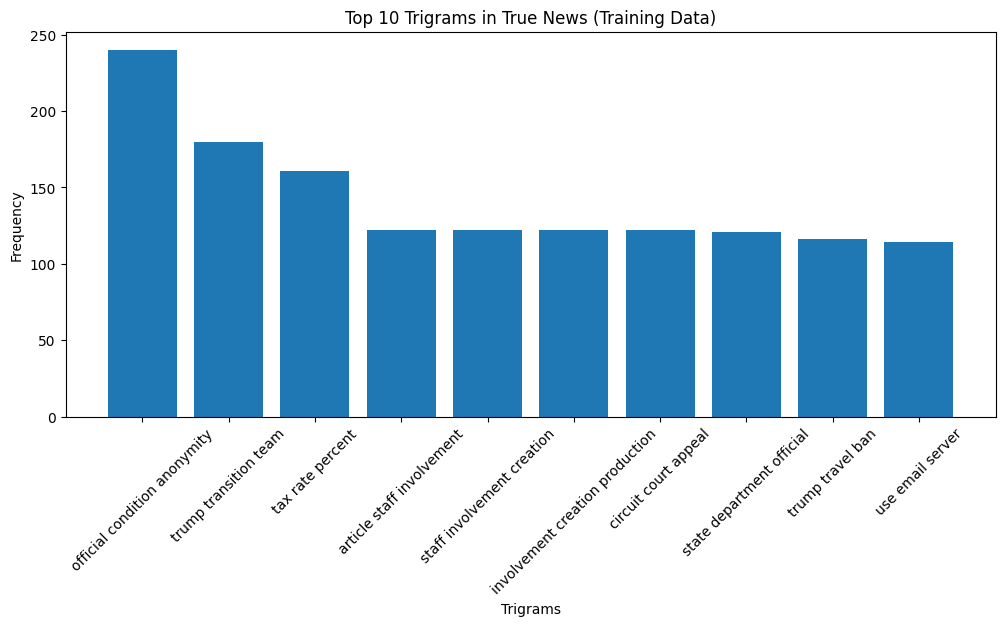

In [132]:
# Prepare data for plotting
trigram_labels = [" ".join(tg) for tg, freq in top_10_trigrams]
frequencies = [freq for tg, freq in top_10_trigrams]

# Plot
plt.figure(figsize=(12, 5))
plt.bar(trigram_labels, frequencies)
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Trigrams in True News (Training Data)")
plt.xticks(rotation=45)
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [134]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
# Filter Fake News
fake_news = train_df[train_df['news_label'] == 0]

# Prepare text
fake_text = fake_news['lemmatized_text'].dropna().astype(str)

# Tokenize (unigrams)
tokens = " ".join(fake_text).split()

In [135]:
# Count unigram frequencies
unigram_freq = Counter(tokens)

# Top 10 unigrams
top_10_unigrams = unigram_freq.most_common(10)

# Print
print("Top 10 Unigrams in Fake News:")
for word, freq in top_10_unigrams:
    print(f"{word}: {freq}")


Top 10 Unigrams in Fake News:
trump: 35984
people: 18432
time: 11224
year: 10428
president: 10324
image: 9789
state: 9031
woman: 8398
video: 8152
news: 7903


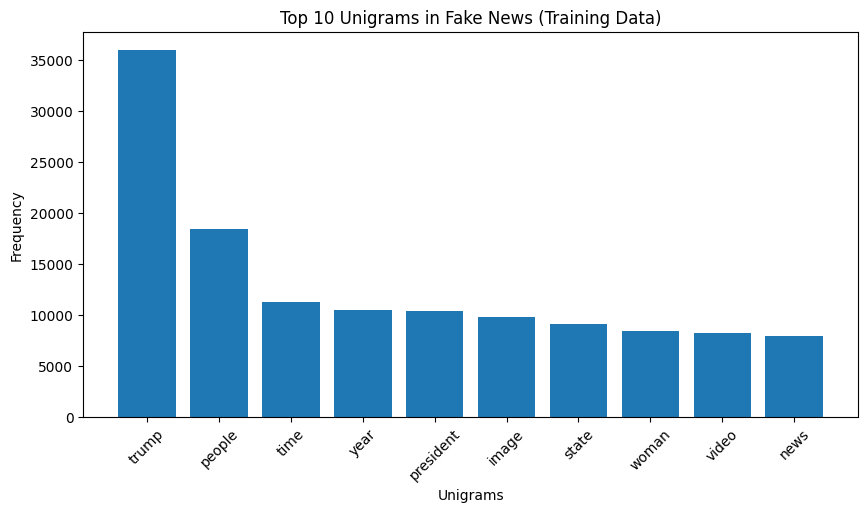

In [136]:
# Prepare data
words = [word for word, freq in top_10_unigrams]
frequencies = [freq for word, freq in top_10_unigrams]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Unigrams in Fake News (Training Data)")
plt.xticks(rotation=45)
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [137]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
# Generate bigrams
bigrams = list(ngrams(tokens, 2))

# Count frequencies
bigram_freq = Counter(bigrams)

# Top 10 bigrams
top_10_bigrams = bigram_freq.most_common(10)

# Print
print("Top 10 Bigrams in Fake News:")
for bg, freq in top_10_bigrams:
    print(f"{bg}: {freq}")


Top 10 Bigrams in Fake News:
('trump', 'supporter'): 1434
('century', 'wire'): 1330
('image', 'image'): 1274
('police', 'officer'): 1200
('trump', 'campaign'): 1145
('law', 'enforcement'): 1046
('trump', 'realdonaldtrump'): 974
('screen', 'capture'): 928
('donald', 'trump'): 903
('image', 'video'): 750


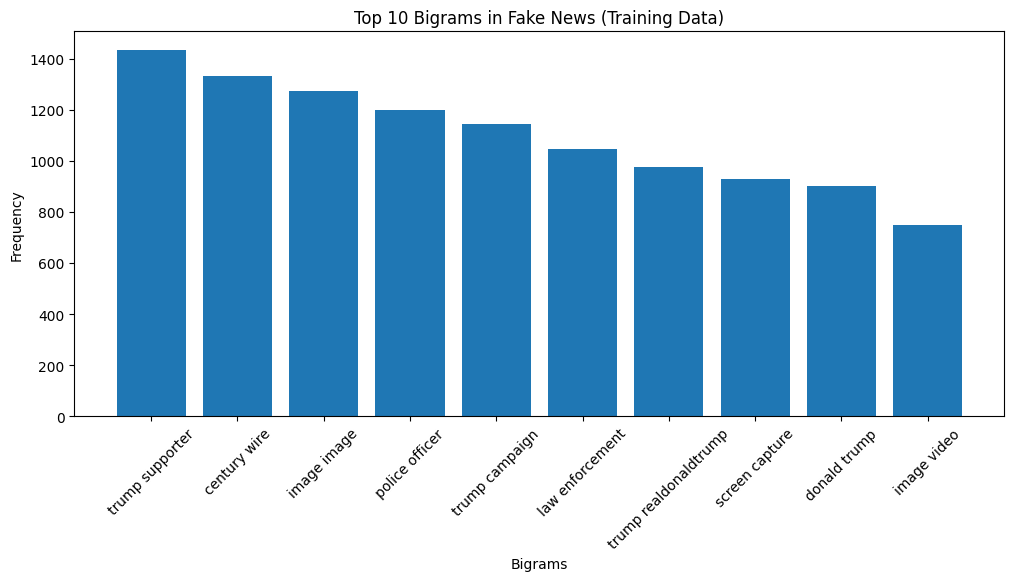

In [138]:
# Prepare labels
bigram_labels = [" ".join(bg) for bg, freq in top_10_bigrams]
frequencies = [freq for bg, freq in top_10_bigrams]

# Plot
plt.figure(figsize=(12, 5))
plt.bar(bigram_labels, frequencies)
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Bigrams in Fake News (Training Data)")
plt.xticks(rotation=45)
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [139]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
# Generate trigrams
trigrams = list(ngrams(tokens, 3))

# Count frequencies
trigram_freq = Counter(trigrams)

# Top 10 trigrams
top_10_trigrams = trigram_freq.most_common(10)

# Print
print("Top 10 Trigrams in Fake News:")
for tg, freq in top_10_trigrams:
    print(f"{tg}: {freq}")


Top 10 Trigrams in Fake News:
('news', 'century', 'wire'): 632
('video', 'screen', 'capture'): 520
('image', 'video', 'screen'): 495
('image', 'getty', 'image'): 396
('image', 'screen', 'capture'): 308
('image', 'chip', 'image'): 180
('century', 'wire', 'file'): 178
('law', 'enforcement', 'officer'): 165
('image', 'video', 'screenshot'): 164
('broadcast', 'boiler', 'room'): 131


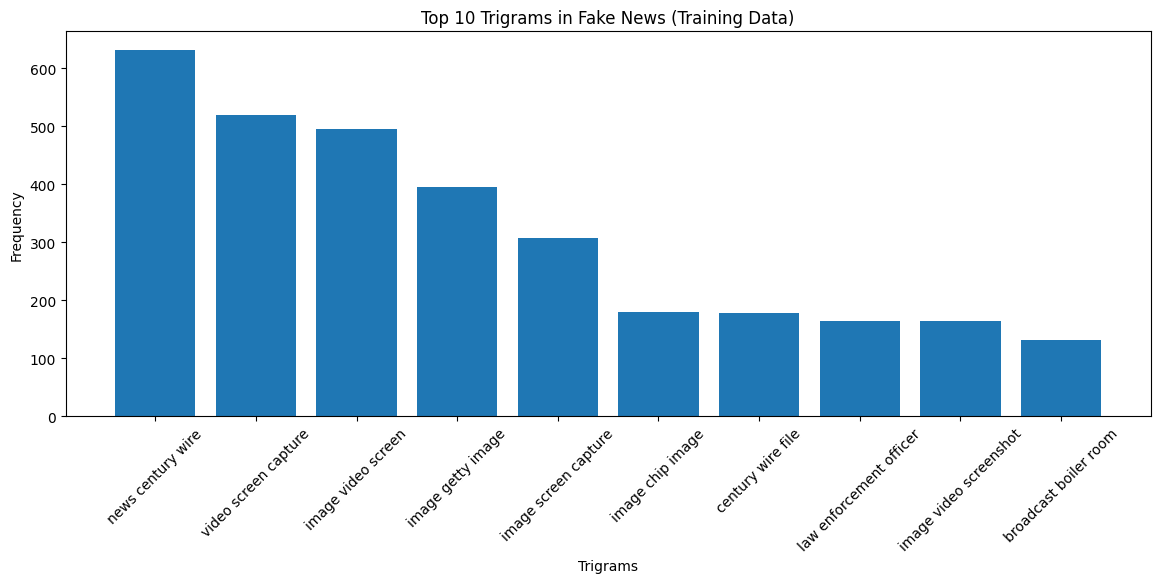

In [140]:
# Prepare labels
trigram_labels = [" ".join(tg) for tg, freq in top_10_trigrams]
frequencies = [freq for tg, freq in top_10_trigrams]

# Plot
plt.figure(figsize=(14, 5))
plt.bar(trigram_labels, frequencies)
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.title("Top 10 Trigrams in Fake News (Training Data)")
plt.xticks(rotation=45)
plt.show()


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [143]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

# Download and load the pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")

# Check the vector size
print(word2vec_model.vector_size)


[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 2.6% 43.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.6% 59.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 4.9% 81.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.8% 96.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 7.8% 130.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 10.1% 167.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.4% 206.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.6% 242.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.8% 279.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.0% 316.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.2% 353.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 23.5% 390.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.8% 412.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.8% 428.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.8% 462.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 28.8% 479.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.9% 498.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 31.2% 519.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.3% 536.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.6% 558.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.4% 588.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.2% 618.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 38.7% 643.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.6% 659.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 40.9% 679.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.0% 714.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 44.0% 731.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.2% 751.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 46.0% 764.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.4% 788.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 48.1% 800.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.6% 824.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 50.4% 838.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 52.0% 865.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.2% 900.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.1% 916.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.5% 938.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================----------------------] 57.3% 952.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.2% 984.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.3% 1019.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 63.6% 1058.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================------------------] 65.9% 1096.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.2% 1118.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================----------------] 68.4% 1137.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================----------------] 69.3% 1152.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.2% 1184.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.4% 1220.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.9% 1246.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.8% 1260.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================================------------] 77.1% 1281.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.3% 1302.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.5% 1321.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================================----------] 80.6% 1340.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================================---------] 82.2% 1367.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.2% 1383.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 84.6% 1407.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.4% 1420.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================================-------] 86.9% 1444.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 88.2% 1465.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 89.4% 1487.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.3% 1501.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================================----] 92.2% 1533.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.5% 1571.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 97.1% 1614.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.4% 1652.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




300


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [144]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

def get_avg_word2vec(text, model, vector_size=300):
    """
    Convert a document into an average Word2Vec vector.
    """
    words = text.split()
    
    # Collect vectors for words present in Word2Vec vocabulary
    word_vectors = [
        model[word] for word in words if word in model.key_to_index
    ]
    
    # If no words found, return zero vector
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    
    # Return average vector
    return np.mean(word_vectors, axis=0)




In [146]:
## Extract the target variable for the training data and validation data
X_train = np.vstack(
    train_df['lemmatized_text']
    .fillna("")
    .apply(lambda x: get_avg_word2vec(x, word2vec_model))
)

y_train = train_df['news_label'].values


In [148]:
X_val = np.vstack(
    val_df['lemmatized_text']
    .fillna("")
    .apply(lambda x: get_avg_word2vec(x, word2vec_model))
)

y_val = val_df['news_label'].values


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [150]:
## Initialise Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)
## Train Logistic Regression model on training data
log_reg.fit(X_train, y_train)
## Predict on validation data
y_val_pred = log_reg.predict(X_val)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [151]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy = accuracy_score(y_val, y_val_pred)

# Precision, Recall, F1-score
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print metrics
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")



Accuracy  : 0.9045
Precision : 0.8936
Recall    : 0.9080
F1-score  : 0.9007


In [152]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(
    y_val,
    y_val_pred,
    target_names=["Fake News", "True News"]
))


              precision    recall  f1-score   support

   Fake News       0.91      0.90      0.91      7040
   True News       0.89      0.91      0.90      6425

    accuracy                           0.90     13465
   macro avg       0.90      0.90      0.90     13465
weighted avg       0.90      0.90      0.90     13465



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [153]:
from sklearn.tree import DecisionTreeClassifier

# Initialise Decision Tree
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=20   # prevents overfitting (optional but recommended)
)

## Train Decision Tree model on training data
dt_model.fit(X_train, y_train)
## Predict on validation data
y_val_pred_dt = dt_model.predict(X_val)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [154]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)

# Precision, Recall, F1-score
precision_dt = precision_score(y_val, y_val_pred_dt)
recall_dt = recall_score(y_val, y_val_pred_dt)
f1_dt = f1_score(y_val, y_val_pred_dt)

# Print metrics
print(f"Decision Tree Accuracy  : {accuracy_dt:.4f}")
print(f"Decision Tree Precision : {precision_dt:.4f}")
print(f"Decision Tree Recall    : {recall_dt:.4f}")
print(f"Decision Tree F1-score  : {f1_dt:.4f}")


Decision Tree Accuracy  : 0.8229
Decision Tree Precision : 0.8272
Decision Tree Recall    : 0.7949
Decision Tree F1-score  : 0.8107


In [155]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(
    y_val,
    y_val_pred_dt,
    target_names=["Fake News", "True News"]
))


              precision    recall  f1-score   support

   Fake News       0.82      0.85      0.83      7040
   True News       0.83      0.79      0.81      6425

    accuracy                           0.82     13465
   macro avg       0.82      0.82      0.82     13465
weighted avg       0.82      0.82      0.82     13465



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [156]:
## Initialise Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Initialise Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,   # Number of trees
    max_depth=20,       # Optional: limit depth to prevent overfitting
    random_state=42,
    n_jobs=-1           # Use all CPU cores for faster training
)

## Train Random Forest model on training data
rf_model.fit(X_train, y_train)

## Predict on validation data
y_val_pred_rf = rf_model.predict(X_val)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [157]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

# Precision, Recall, F1-score
precision_rf = precision_score(y_val, y_val_pred_rf)
recall_rf = recall_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)

# Print metrics
print(f"Random Forest Accuracy  : {accuracy_rf:.4f}")
print(f"Random Forest Precision : {precision_rf:.4f}")
print(f"Random Forest Recall    : {recall_rf:.4f}")
print(f"Random Forest F1-score  : {f1_rf:.4f}")


Random Forest Accuracy  : 0.9104
Random Forest Precision : 0.9120
Random Forest Recall    : 0.8988
Random Forest F1-score  : 0.9054


In [158]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(
    y_val,
    y_val_pred_rf,
    target_names=["Fake News", "True News"]
))


              precision    recall  f1-score   support

   Fake News       0.91      0.92      0.91      7040
   True News       0.91      0.90      0.91      6425

    accuracy                           0.91     13465
   macro avg       0.91      0.91      0.91     13465
weighted avg       0.91      0.91      0.91     13465



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.